In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from oiffile import imread
from PIL import Image
import random
import skimage
from skimage.transform import resize
import matplotlib
import glob
import torch
import sys
sys.path.insert(0, '..')
import scipy.io as sio
import matplotlib.patches as patches
from skimage.measure import label,regionprops
from matplotlib_scalebar.scalebar import ScaleBar
from skimage.transform import rescale
import dognet
import functions
from sklearn.metrics import roc_curve, auc
import os, os.path
%matplotlib inline
from skimage.draw import circle
from scipy.ndimage import gaussian_filter

In [3]:
sc = [14,15,16,17]
lrs = [1e-4,5e-4,1e-3,5e-3]

totalNets=[ [[],[],[],[]], [[],[],[],[]], [[],[],[],[]], [[],[],[],[]] ]
totalErrors=[ [[],[],[],[]], [[],[],[],[]], [[],[],[],[]], [[],[],[],[]] ]
totalTestErrors=[ [[],[],[],[]], [[],[],[],[]], [[],[],[],[]], [[],[],[],[]] ]

for p in range(0,4):
    #get training masks
    path1 = glob.glob("../datasets/flocculusA/trainingMasksGaussian/*.npy")
    trainingMasks = functions.get_trainingMasks(path1)
    #get and scale training images
    path2 = glob.glob("../datasets/flocculusA/trainingImages3/*.npy")
    trainingImages,collman = functions.get_trainingImages(path2,sc[p])
    
    imagestraining=[0,1,2,3,5,6,8,9,10,12,13,14,15,16,17,19,20,21,22,24,26,28,29,31,32,33,34]
    imagestesting=[4,7,11,18,23,25,27,30,35]

    newTrainingImages=[]
    newTrainingMasks=[]
    testingImages=[]
    testingMasks=[]


    for i in range(0,27):
        num = imagestraining[i]
        newTrainingImages.append(trainingImages[num])
        newTrainingMasks.append(trainingMasks[num])

    for j in range(0,9):
        num = imagestesting[j]
        testingImages.append(trainingImages[num])
        testingMasks.append(trainingMasks[num])
    
    for m in range(0,4):
        device = torch.device("cpu")
        net = dognet.SimpleAnisotropic(3,15,27).to(device)
        net.weights_init()
        net,errors,test_errors=dognet.train_routine(net.to(device),dognet.create_generator(newTrainingImages,newTrainingMasks),dognet.create_generator(testingImages,testingMasks),n_iter=3000,margin=5,loss='softdice',lr=lrs[m])
        
        totalNets[p][m]=net
        totalErrors[p][m]=errors
        totalTestErrors[p][m]=test_errors

tensor([406.2485]) (10, 1, 64, 64) 4096 100.52385013660839 1.0
<function soft_dice_loss at 0x134068f28>
Training started!


/anaconda3/envs/dogsenv/lib/python3.6/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[====================] 100%
Training finished!
tensor([40472.3789]) (10, 1, 64, 64) 4096 0.0 0.0
<function soft_dice_loss at 0x134068f28>
Training started!
[====================] 100%
Training finished!
tensor([40860.3164]) (10, 1, 64, 64) 4096 0.0 0.0
<function soft_dice_loss at 0x134068f28>
Training started!
[====================] 100%
Training finished!
tensor([40513.3438]) (10, 1, 64, 64) 4096 0.0 0.0
<function soft_dice_loss at 0x134068f28>
Training started!
[====================] 100%
Training finished!
tensor([40443.1133]) (10, 1, 64, 64) 4096 0.0 0.0
<function soft_dice_loss at 0x134068f28>
Training started!
[====================] 100%
Training finished!
tensor([174.3022]) (10, 1, 64, 64) 4096 233.6536027406048 1.0
<function soft_dice_loss at 0x134068f28>
Training started!
[====================] 100%
Training finished!
tensor([40660.8008]) (10, 1, 64, 64) 4096 0.0 0.0
<function soft_dice_loss at 0x134068f28>
Training started!
[====================] 100%
Training finished!
tenso

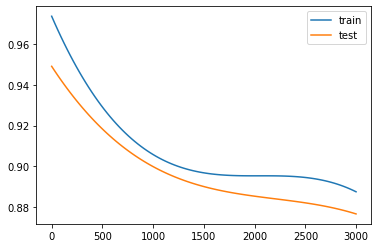

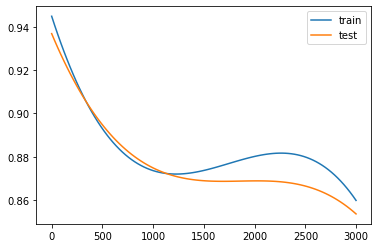

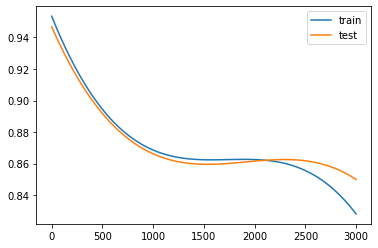

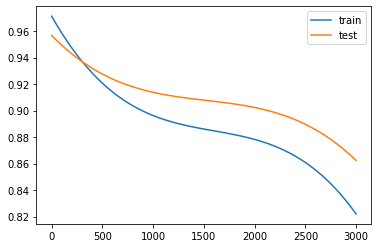

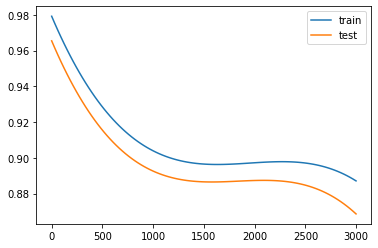

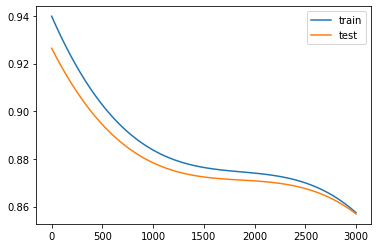

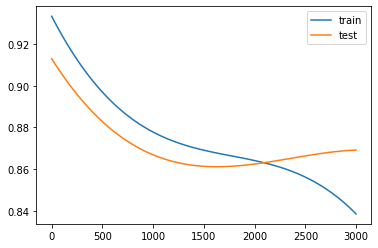

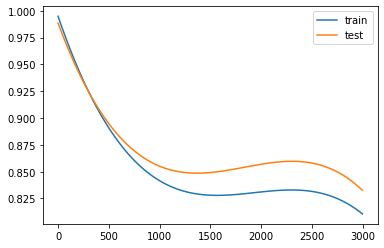

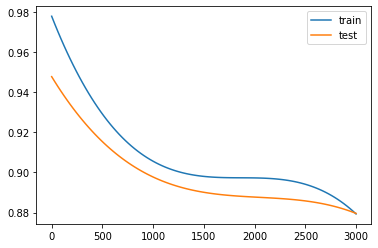

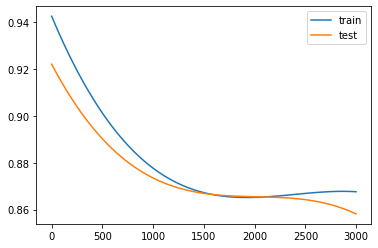

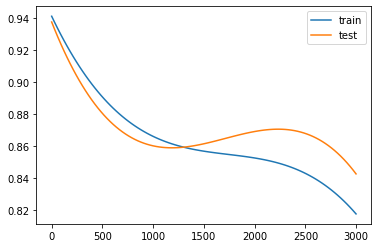

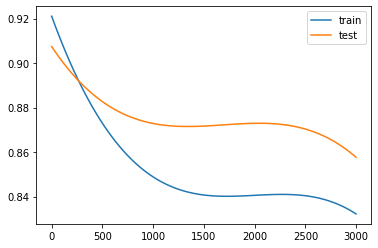

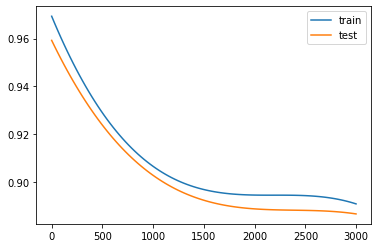

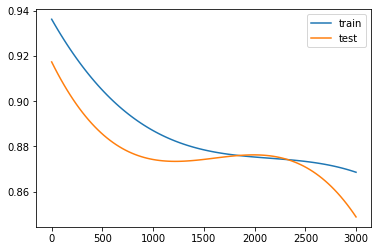

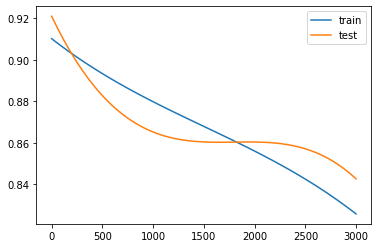

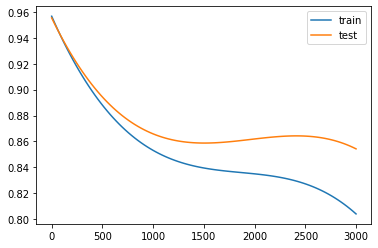

In [17]:
from scipy.interpolate import UnivariateSpline


for i in range(0,4):
    for j in range(0,4):
        y= totalErrors[i][j]
        x= range(0,3000)
        s = UnivariateSpline(x, y, s=70)#8
        xs = np.linspace(0, 2999, 100)
        ys = s(xs)
        #plt.plot(x, y, 'o')
        plt.plot(xs, ys)
        y= totalTestErrors[i][j]
        x= range(0,3000)
        s = UnivariateSpline(x, y, s=50) #6
        xs = np.linspace(0, 2999, 100)
        ys = s(xs)
        #plt.plot(x, y, 'o')
        plt.plot(xs, ys)
        plt.legend(["train", "test"])
        plt.show()

In [18]:
for i in range(0,4):
    for j in range(0,4):
        if i == 0:
            scNum="sc14"
        elif i == 1:
            scNum="sc15"
        elif i == 2:
            scNum="sc16"   
        elif i == 3:
            scNum="sc17"
        if j == 0:
            lrN = "1e-4"
        elif j == 1:
            lrN = "5e-4"
        elif j == 2:
            lrN = "1e-3"
        elif j == 3:
            lrN = "5e-3"

        nName="../notebooks/nets/%s_%s" % (scNum,lrN)
        
        torch.save(totalNets[i][j], nName)

In [20]:
for i in range(0,4):
    for j in range(0,4):
        if i == 0:
            scNum="sc14"
        elif i == 1:
            scNum="sc15"
        elif i == 2:
            scNum="sc16"   
        elif i == 3:
            scNum="sc17"
        if j == 0:
            lrN = "1e-4"
        elif j == 1:
            lrN = "5e-4"
        elif j == 2:
            lrN = "1e-3"
        elif j == 3:
            lrN = "5e-3"

        nName="../notebooks/nets/error/test_%s_%s" % (scNum,lrN)
        
        np.savetxt(nName, totalTestErrors[i][j])

In [25]:
def distance(y1,y2):
    dist = (y2 - y1)
    return dist

In [26]:
dists=[]
for i in range(0,1500):
    d = distance(test_errors[i],errors[i])
    dists.append(d)

In [28]:
np.min(dists)

-0.3455389142036438

7
sc141e-4
sc145e-4
sc141e-3
sc145e-3
sc151e-4
sc155e-4
sc151e-3
sc155e-3
sc161e-4
sc165e-4
sc161e-3
sc165e-3
sc171e-4
sc175e-4
sc171e-3
sc175e-3


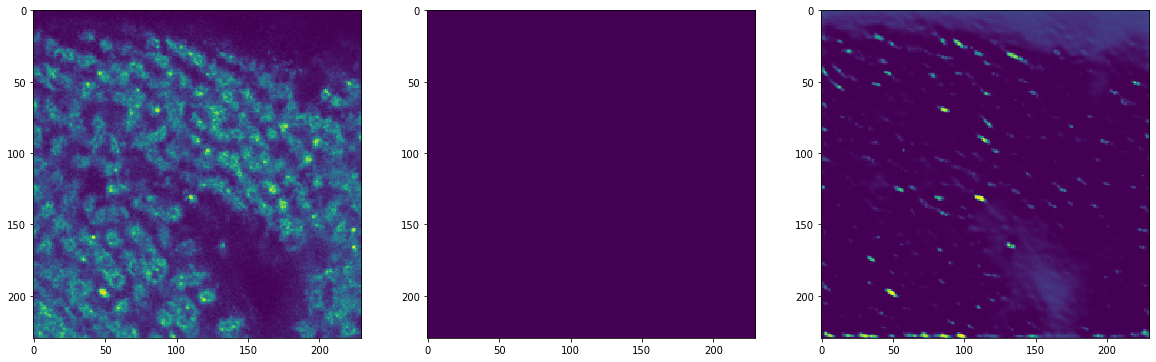

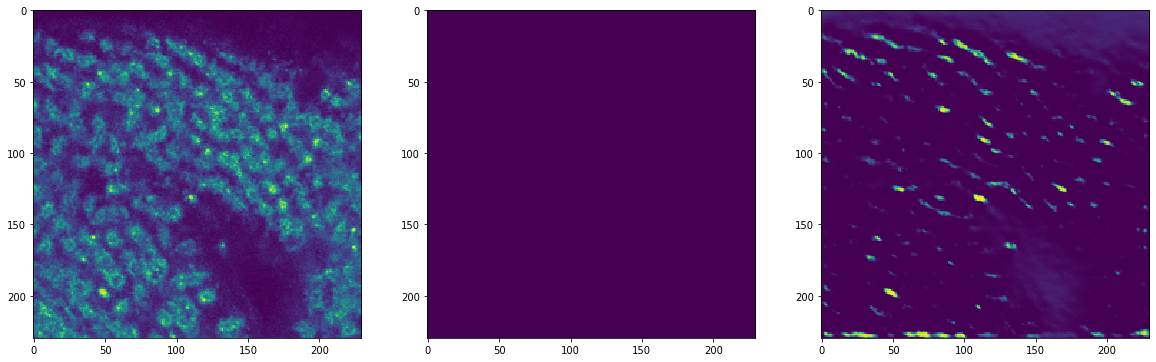

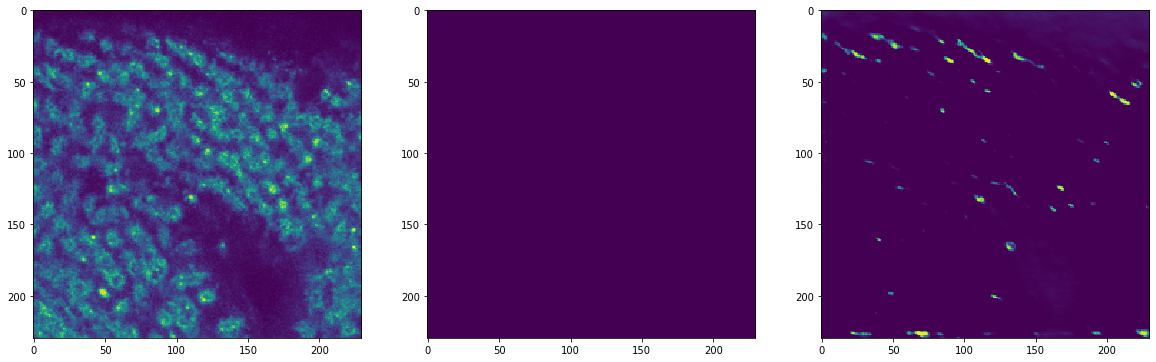

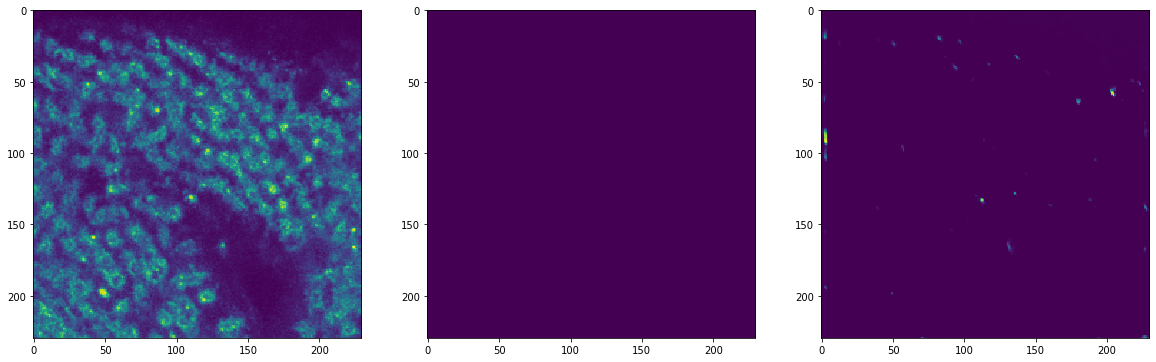

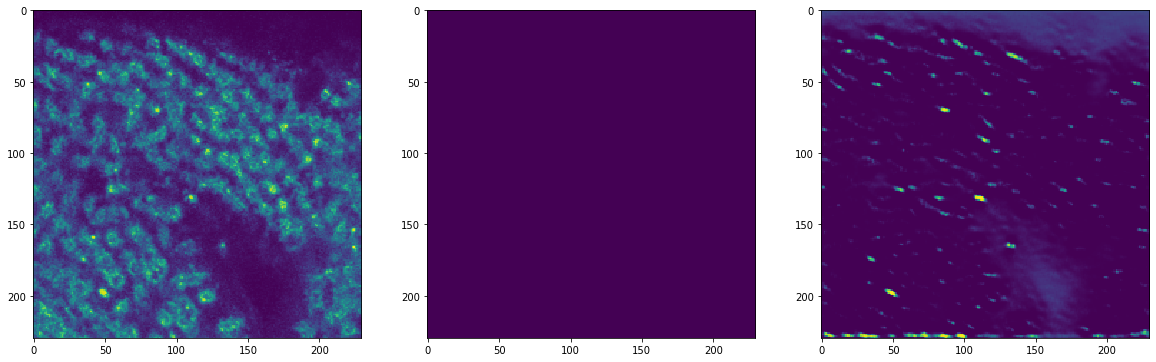

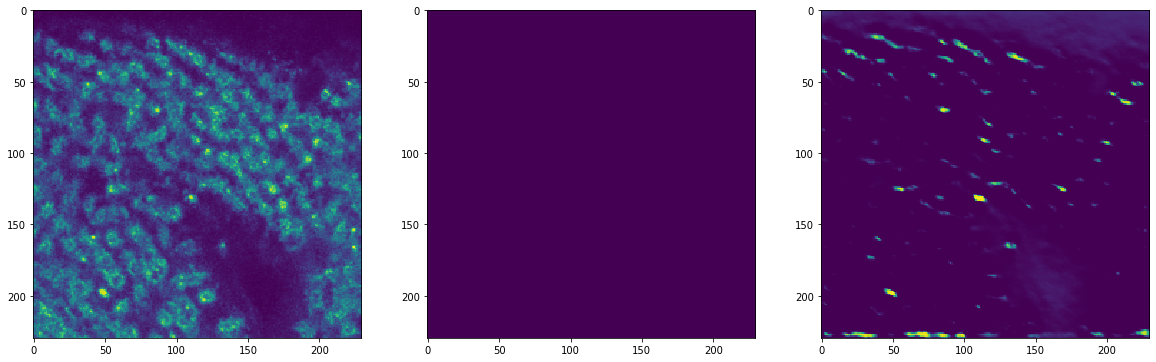

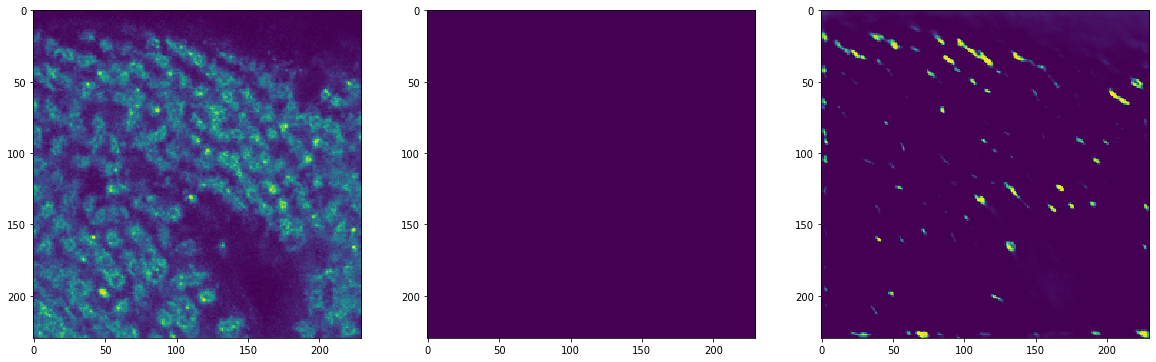

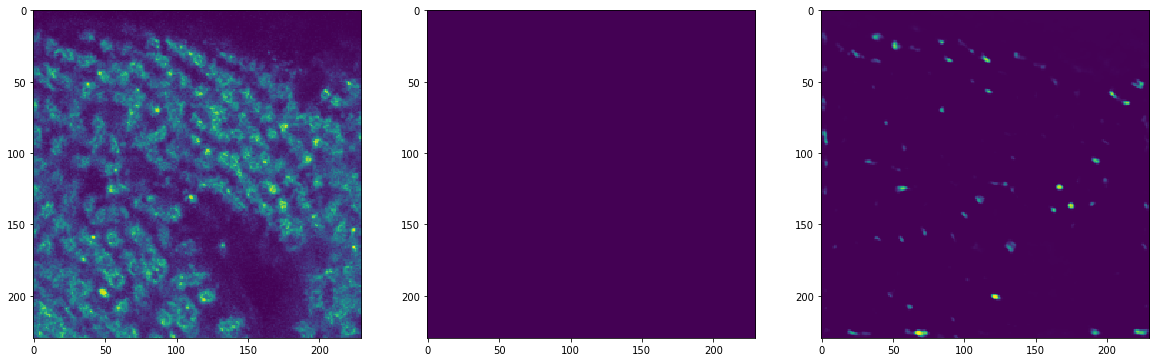

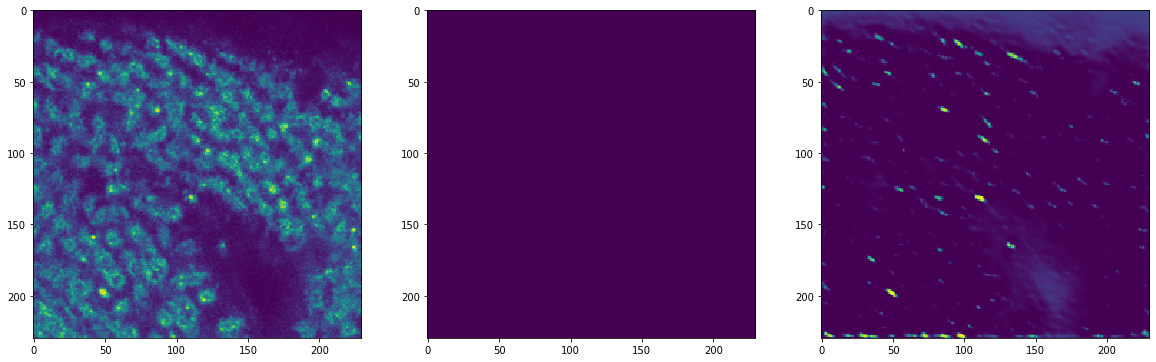

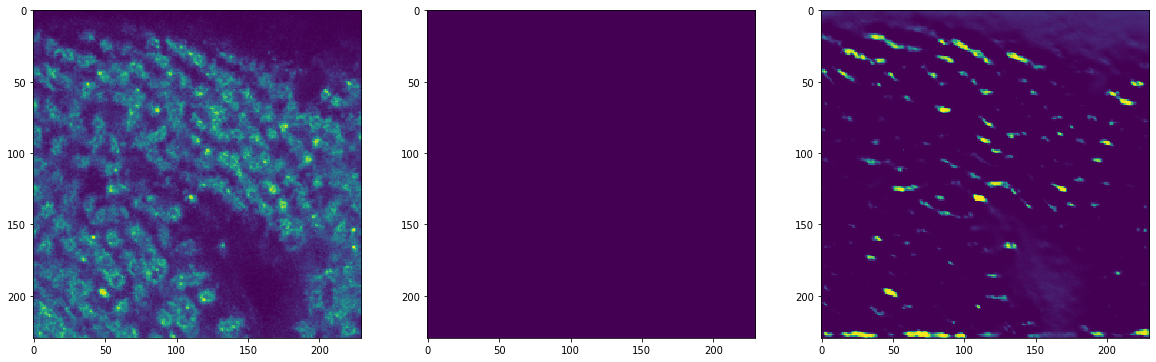

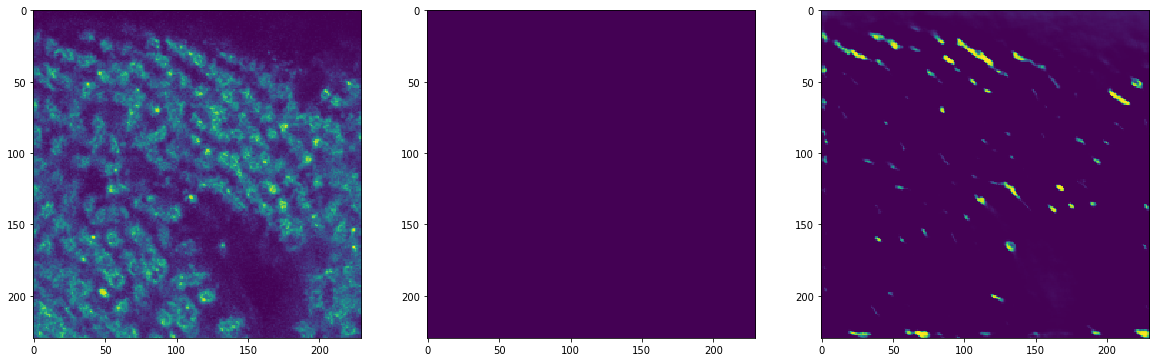

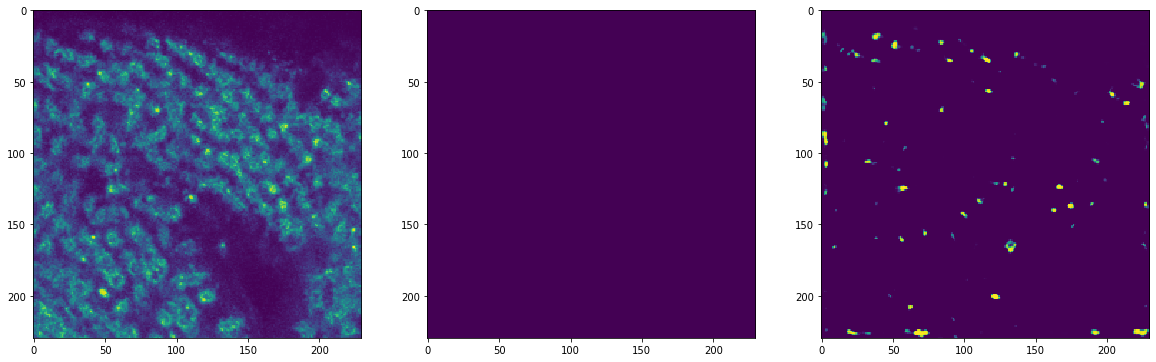

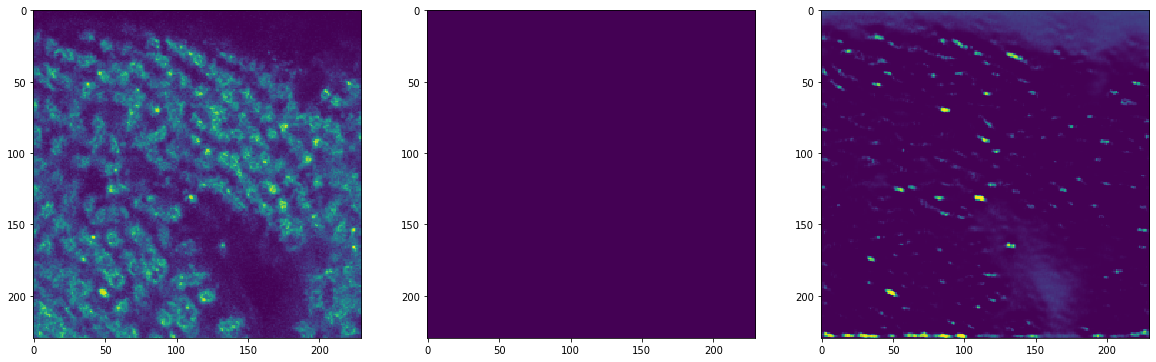

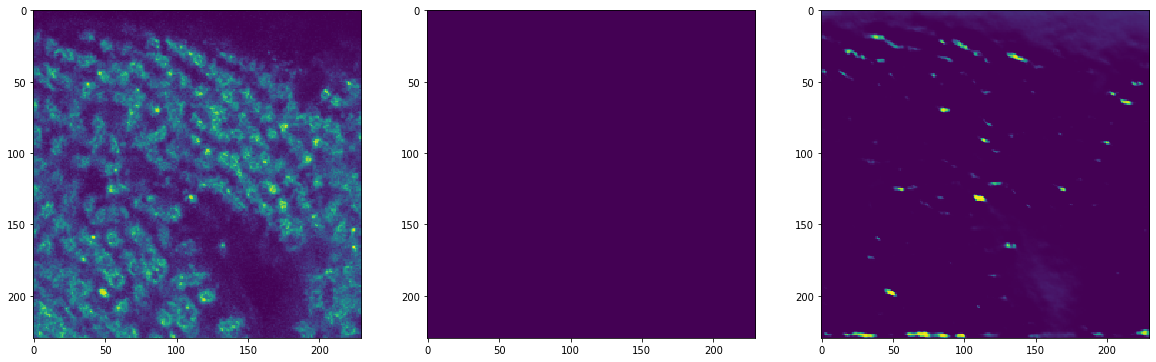

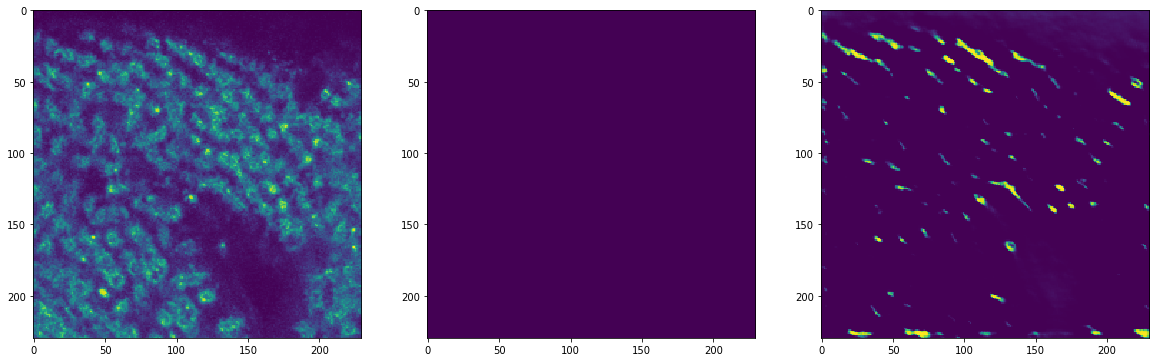

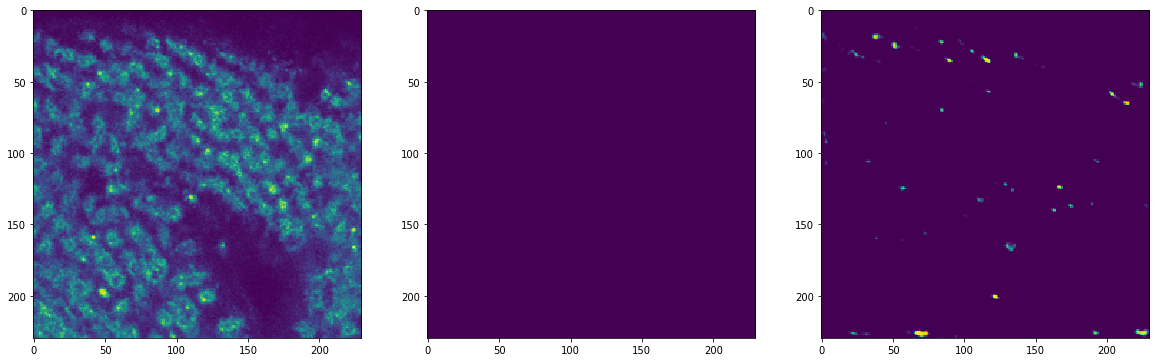

In [27]:
x=random.choice([4,7,11,18,23,25,30,35])
print(x)
testingNumber=1
b = functions.get_coords(x,testingNumber,len(trainingImages))
for i in range(0,4):
    for j in range(0,4):
        if i == 0:
            scNum="sc14"
        elif i == 1:
            scNum="sc15"
        elif i == 2:
            scNum="sc16"   
        elif i == 3:
            scNum="sc17"
        if j == 0:
            lrN = "1e-4"
        elif j == 1:
            lrN = "5e-4"
        elif j == 2:
            lrN = "1e-3"
        elif j == 3:
            lrN = "5e-3"
        functions.show_prediction(x,testingNumber,trainingImages,trainingMasks,collman,totalNets[i][j],b)
        print(scNum+lrN)

In [15]:
import sys

import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable

def soft_dice_loss(y_pred, y_true, epsilon=1e-6):
    ''' 
    Soft dice loss calculation for arbitrary batch size, number of classes, and number of spatial dimensions.
    Assumes the `channels_last` format.

    # Arguments
        y_pred: b x N x X x Y Network output, must sum to 1 over c channel (such as after softmax) 
        y_true: b x N x X x Y  One hot encoding of ground truth       
        epsilon: Used for numerical stability to avoid divide by zero errors

    # References
        V-Net: Fully Convolutional Neural Networks for Volumetric Medical Image Segmentation 
        https://arxiv.org/abs/1606.04797
        More details on Dice loss formulation 
        https://mediatum.ub.tum.de/doc/1395260/1395260.pdf (page 72)

        Adapted from https://github.com/Lasagne/Recipes/issues/99#issuecomment-347775022
    '''

    # skip the batch and class axis for calculating Dice score

    numerator = 2. * torch.sum(y_pred * y_true)
    denominator = torch.sum(y_pred.pow(2) + y_true)
    
    return 1 - torch.mean(numerator / (denominator + epsilon))  # average over classes and batch

def test_routine(detector,
                  generator,
                  n_iter=5000,
                  loss="bce",
                  lr=0.01,
                  margin=10,
                  decay_schedule=(3000, 0.1),
                  optimizer=None,
                  regk=0.,
                  verbose=True):
    
    """
    Train a detector with respect to the data from generator
    :param detector: A detector network
    :param generator: A generator
    :param n_iter: number of iterations
    :param loss: loss function
    :param lr: starting learning rate
    :param margin: margin for ignore
    :param decay_schedule: pair of a which iteration and how should we decay
    :param use_gpu: if system has cuda support, the training can be run on GPU
    :return: trained network, errors
    """
    
    device = torch.device("cpu")
    
    if optimizer is None:
        optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, detector.parameters()), lr=lr)
    
    _, y = generator()
    sumy = y[0,0].sum()
    if 0==sumy:
        sumy=1
    ky = torch.FloatTensor([(y.shape[-1]*y.shape[-2]-y.sum()/y.shape[0])/sumy*y.shape[0]]).to(device)
    
    floss = soft_dice_loss
    if loss=="bce":
        floss = nn.BCELoss()
    elif loss== "L2":
        floss = nn.MSELoss()
    elif loss=="softdice":
        floss = soft_dice_loss
    elif loss=="weightbce":
        floss = create_weight(ky)
        
    
    #optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, detector.parameters()), lr=lr)
    errors = []
   
    percent_old = 0
    for i in range(n_iter):
        x, y = generator()
        vx, vy = torch.from_numpy(x).float().to(device), \
                 torch.from_numpy(y).float().to(device)


        p, _ = detector(vx)
        optimizer.zero_grad()
        l = floss(p[:, :, margin:-margin, margin:-margin], vy[:, :, margin:-margin, margin:-margin])+regk*torch.sum(torch.pow(detector.get_reg_params().__next__(),2))

        errors.append(l.item())
        l.backward()
        optimizer.step()

        if 0 == (i + 1) % decay_schedule[0]:
            lr = lr * decay_schedule[1]
            update_rate(optimizer, lr)

        percent = int(float(i) / float(n_iter) * 20.)
        if percent_old != percent:
            percent_old = percent
    
    detector.eval()
    
    return errors

In [16]:
generator = dognet.create_generator(trainingImages,trainingMasks)

errors =test_routine(net,generator,n_iter=800)


/anaconda3/envs/dogsenv/lib/python3.6/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


KeyboardInterrupt: 